In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data
df = pd.read_csv('train.csv')

In [3]:
# Counting null elements on each DataFrame
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df[df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [5]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
X.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# Dealing with missing data for X
X = X.drop('Embarked', axis=1, inplace=False)
X['Age'].fillna(value=X['Age'].mean(), inplace=True)

In [8]:
X.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [9]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [10]:
# Encoding categorical data
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

In [11]:
X

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


# Plotting the data

In [12]:
# Seaborn 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

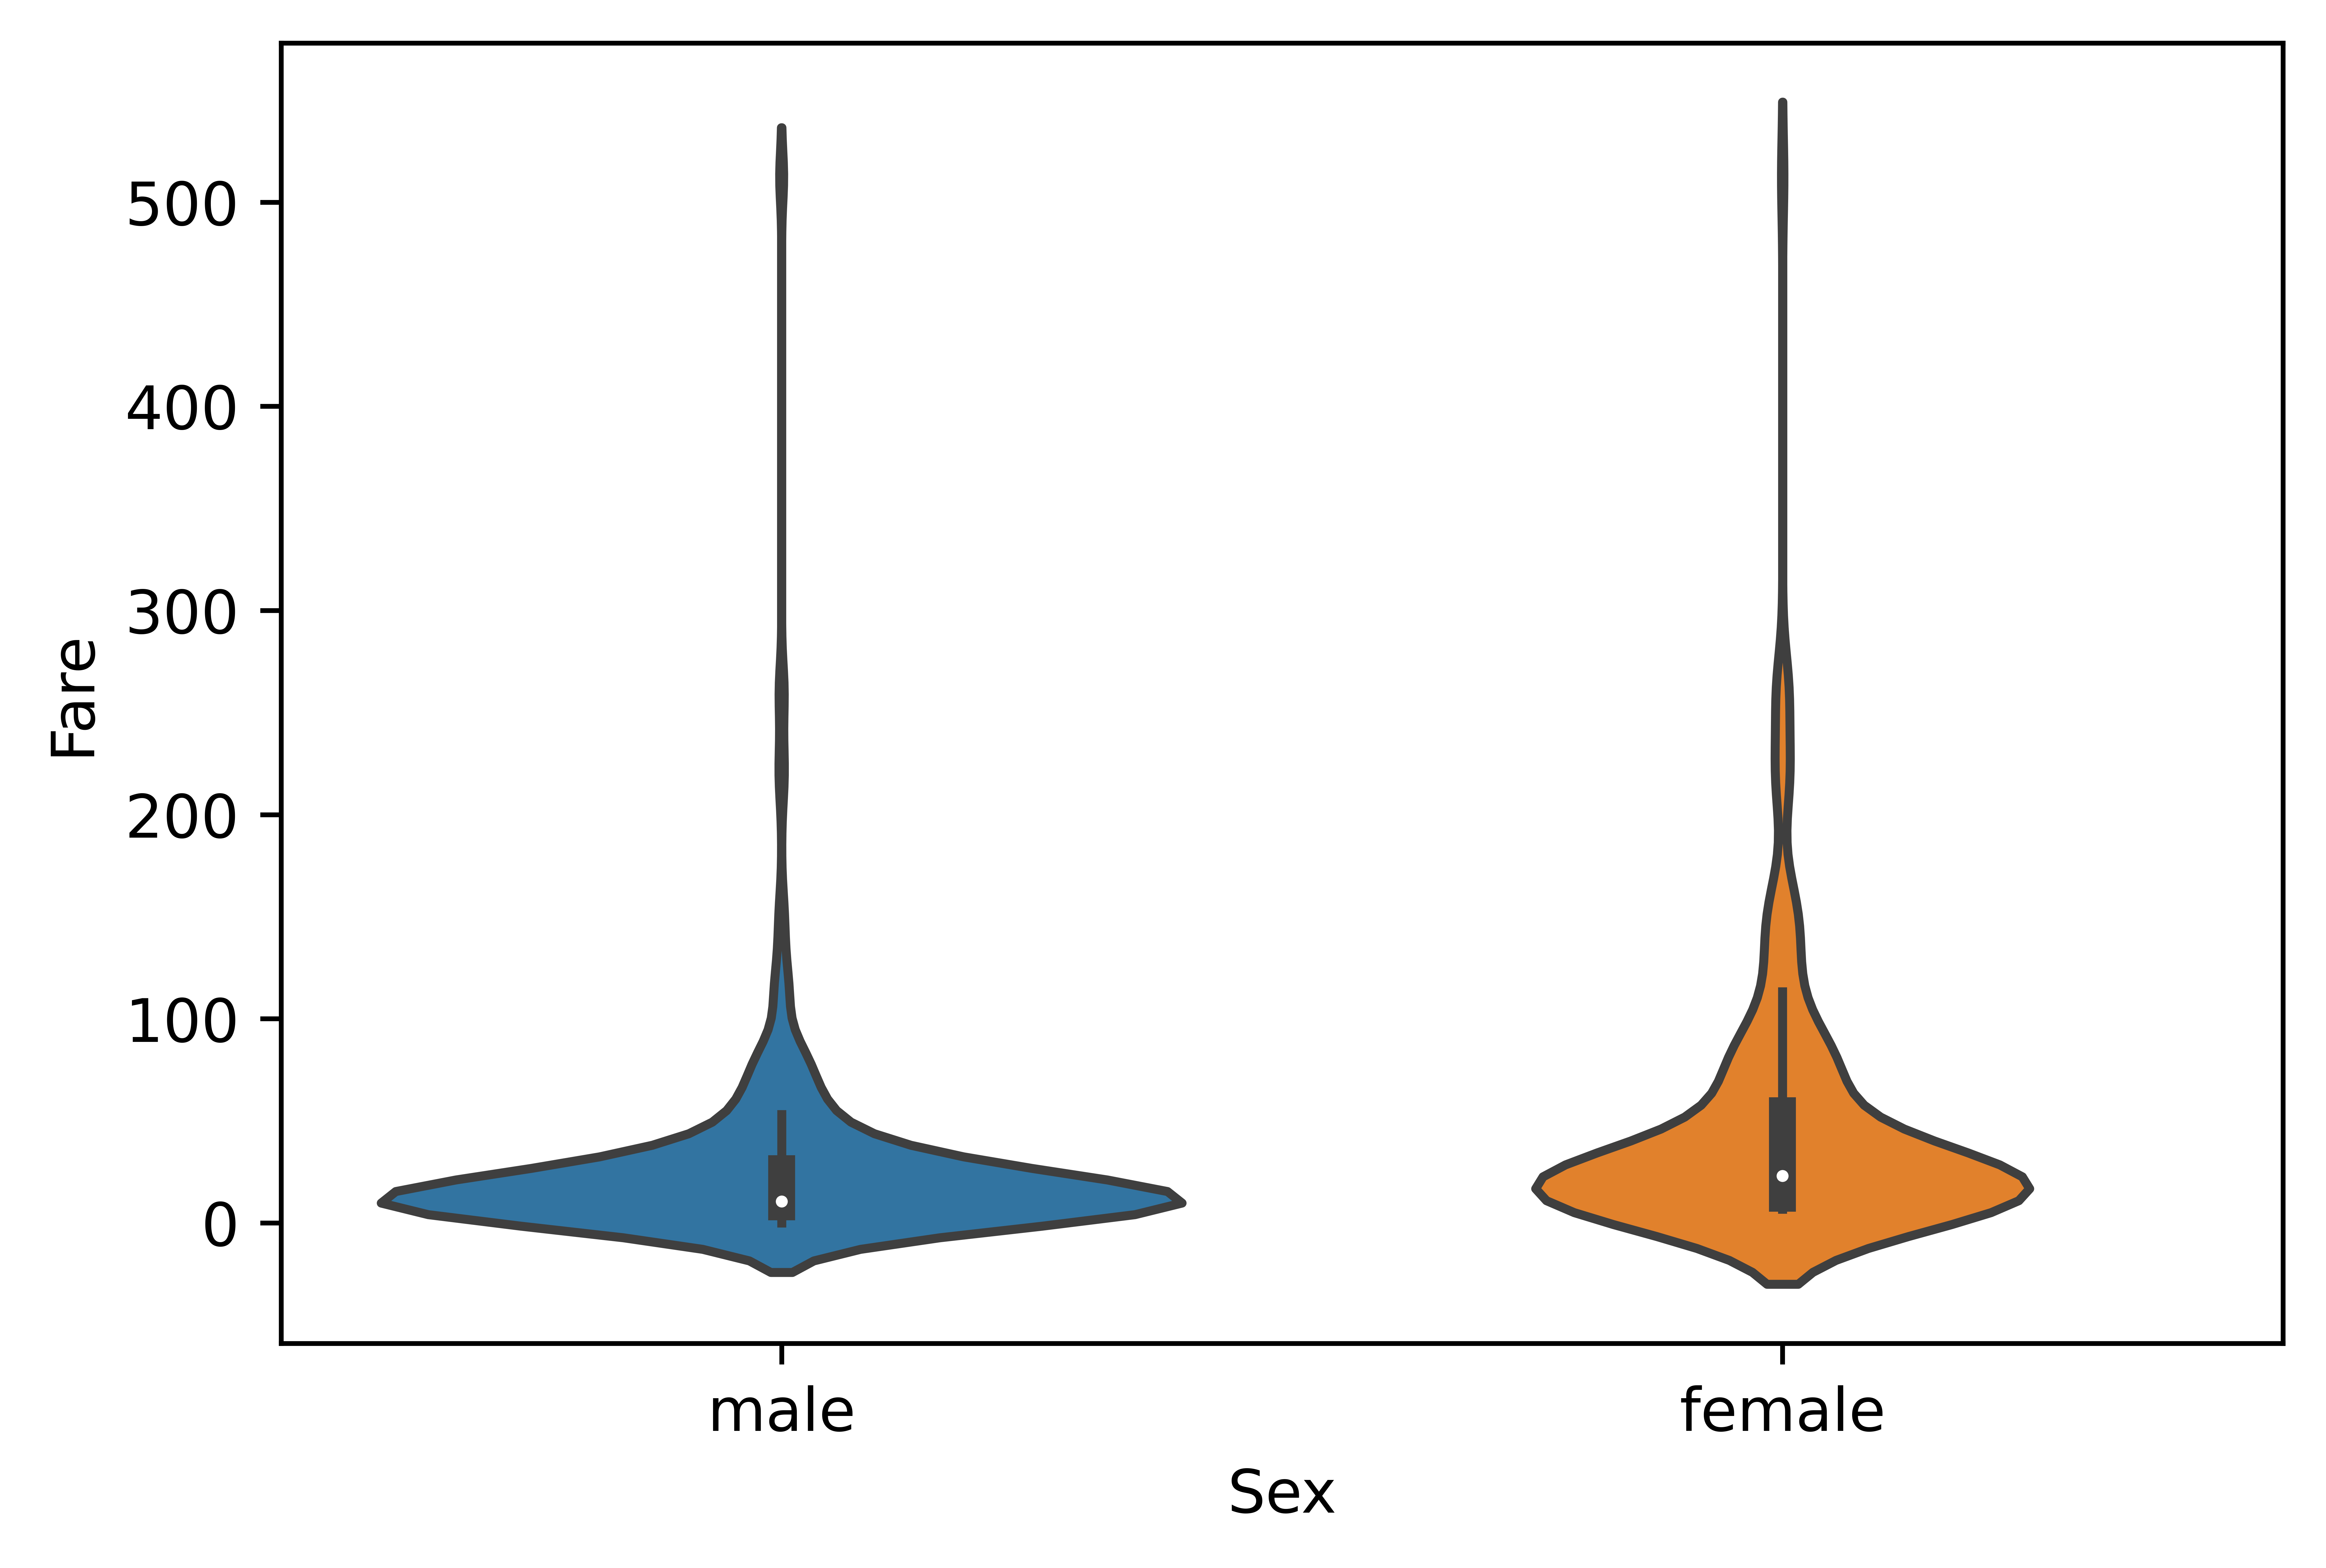

In [13]:
# Violinplot
plt.figure(dpi=1501)
sns.violinplot(x='Sex', y='Fare', data=df)

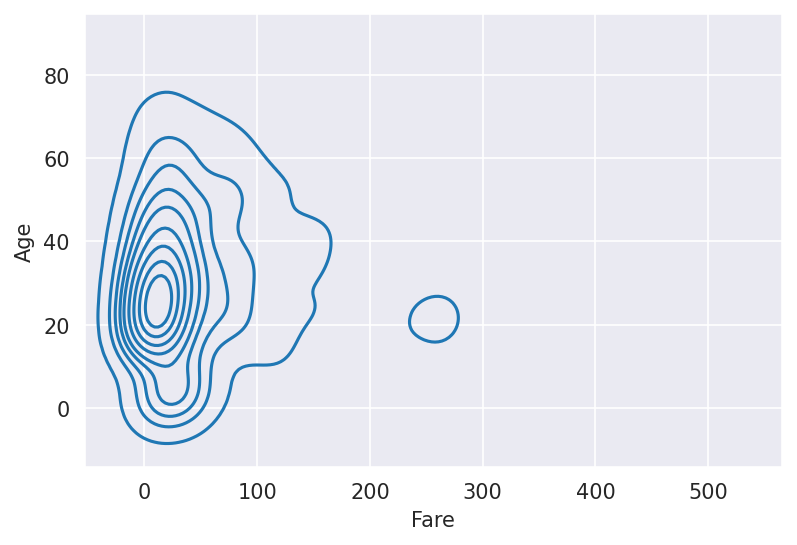

In [14]:
with sns.axes_style('darkgrid'):
    plt.figure(dpi=150)
    sns.kdeplot(data=df, x='Fare', y='Age')

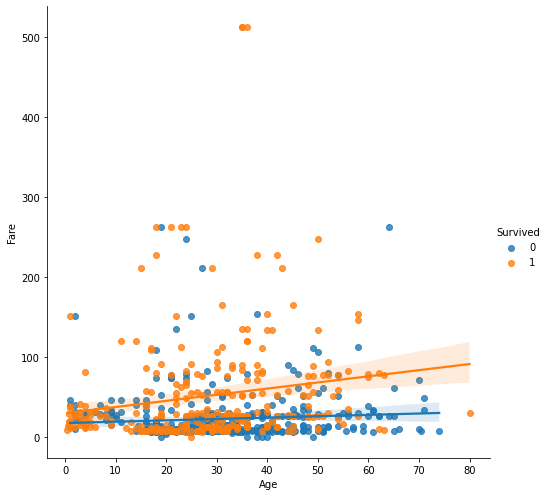

In [15]:
# lmplot 
sns.lmplot(data=df, x='Age', y='Fare', hue='Survived', height=7, aspect=1)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

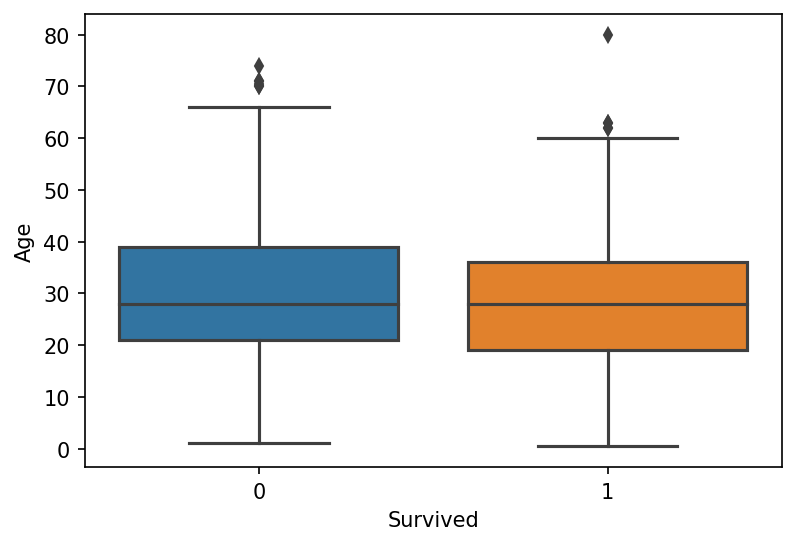

In [16]:
# boxplot
plt.figure(dpi=150)
sns.boxplot(x='Survived', y='Age', data=df)

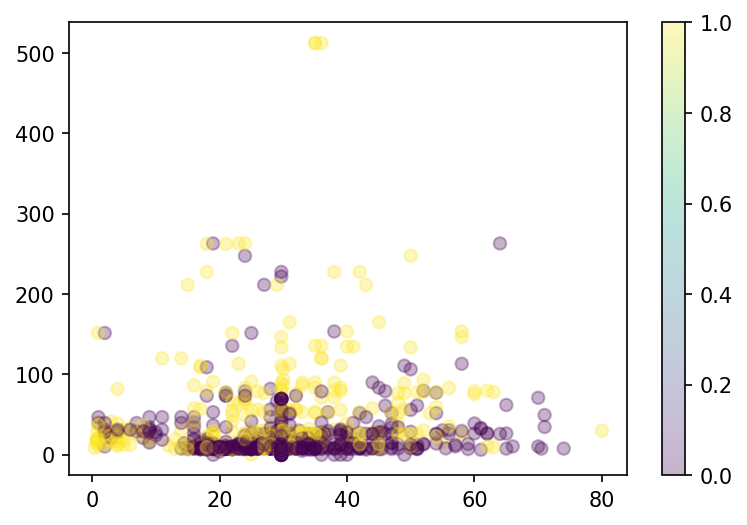

In [17]:
# Make simple scatter plot

rng = np.random.RandomState(0)

colors = rng.rand(len(X))

plt.figure(dpi=150)
plt.scatter(X['Age'], X['Fare'], c=X['Survived'], alpha=0.3, cmap='viridis')
plt.colorbar()

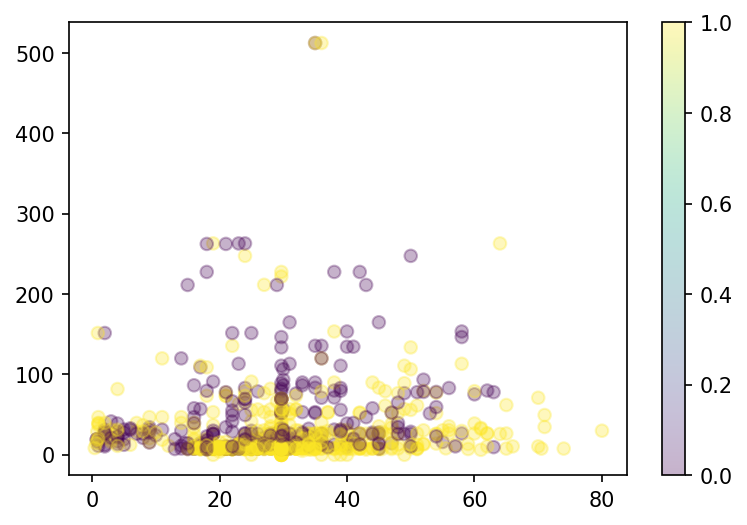

In [20]:
# Make simple scatter plot

rng = np.random.RandomState(0)

colors = rng.rand(len(X))

plt.figure(dpi=150)
plt.scatter(X['Age'], X['Fare'], c=X['Sex_male'], alpha=0.3)
plt.colorbar()